<a href="https://colab.research.google.com/github/AanchalA/PyTorch-Deep-Learning-Bootcamp/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.learnpytorch.io/01_pytorch_workflow/
- PyTorch Cheat Sheet - https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
import torch
from torch import nn                ## Contains all of pytorchs' building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

## Data Preparation and Loading

Data preparation using linear regression formula:
- We'll make a straight line with the linear regression formula with known parameters



In [ ]:
# Create the "known" parameters

weight = 0.7
bias = 0.3

In [ ]:
## Creating the data

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)         ## SHAPE: ([50]) --> ([50, 1])
y = weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

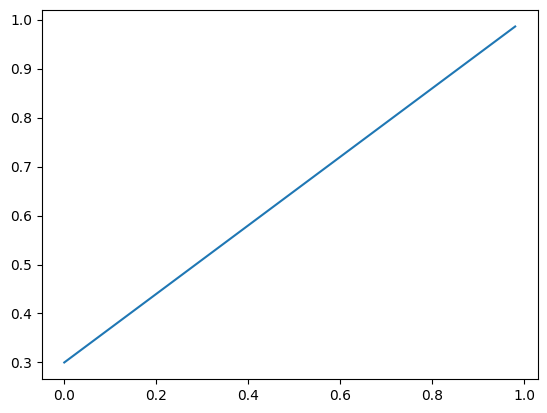

In [ ]:
plt.plot(X, y)

## Splitting data into train and test sets

In [ ]:
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Data Visualization

In [ ]:
def plot_prediction(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
    """
    Plots trainind data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size": 14})

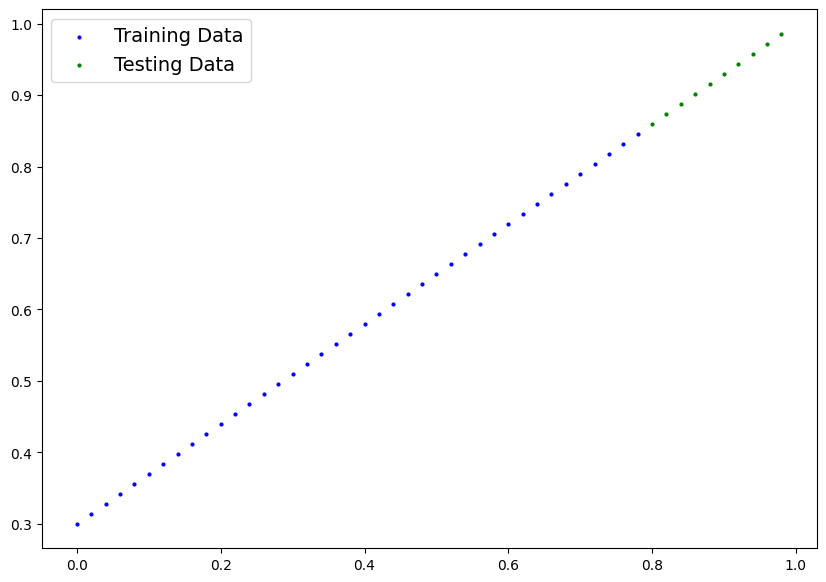

In [ ]:
plot_prediction()

## Building a PyTorch Model

Through two main algorithms:

- Gradient descent - https://youtu.be/IHZwWFHWa-w
- Backpropagation - https://youtu.be/Ilg3gGewQ5U
- PyTorch AutoGrad - https://pytorch.org/docs/stable/autograd.html


---


PyTorch module	What does it do?
- `torch.nn` - Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
- `torch.nn.Parameter` - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
- `torch.nn.Module` - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
- `torch.optim` - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
- `def forward()` -	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))         ## torch.float32
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))            ## torch.float32
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()
model

LinearRegressionModel()

In [ ]:
# for index, params in enumerate(model.parameters()):
#     print(index, params)
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():                ## Shuold be requires_grad=False, but giving requires_grad=True???
    print(list(model.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
with torch.no_grad():                ## Shuold be requires_grad=False, but giving requires_grad=True???
    print(list(model.parameters()))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
list(model.eval().parameters())         ## Shuold be requires_grad=False, but giving requires_grad=True???

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
## Getting the list of **Named Parameters**
model.state_dict()          ## Names are the variable names set by us in __init__()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

- Making predicions using the `torch.inference_mode()`
- When we pass data to the model, it is going to run the data through the `forward()` method to make the predictions.

In [ ]:
with torch.no_grad():                       ## old way
    y_preds = model(X_test)

with torch.inference_mode():                ## replace troch.no_grad() with torch.inference_mode() context manager
    y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

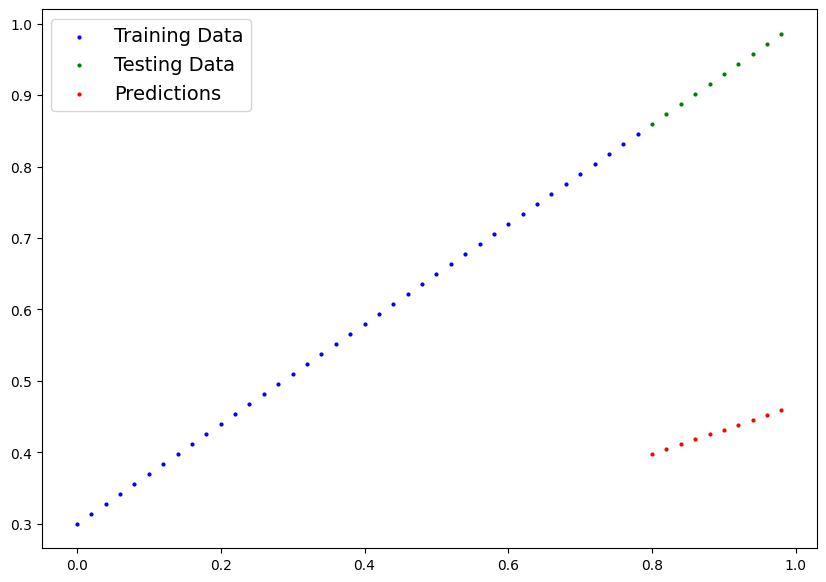

In [ ]:
plot_prediction(predictions=y_preds)

## Loss Function and Optimizer

In [ ]:
## Set up the loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [ ]:
## Setting up the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building a Training Loop and Testing Loop in PyTorch
1. Loop through the training data
2.1 Set the model to training mode, train model sets the model parameters attribute "requires_grad" = True
2. Run the inputs through the forward pass, get some prediction
3. Calculate a the loss
4. Optimizer.zero_grad - set the previous gradients to zero
5. Loss backward (Back-propagation): Run back-propagation. Move backwards through the network to calculate the gradients of each parameter w.r.t the loss.
6. optimizer step (Gradient Descent): Update the parameter value to minimize the loss.


In [ ]:
epochs = 201 # 161

In [ ]:
torch.manual_seed(42)

# Experiment Tracking
epoch_count = list()
train_loss_values = list()
test_loss_values = list()

# Loop though the training data, epoch number of times
for epoch in range(epochs):

    # :::::::::: MODEL TRAINING ::::::::::
    # Set the model to train mode
    model.train()

    # Running the forward pass
    y_preds_train = model(X_train)

    # Calculate the loss
    train_loss = loss_fn(y_preds_train, y_train)

    # Set the previous gradients to zero
    optimizer.zero_grad()

    # Back Propagation: Calculates the gradients
    train_loss.backward()

    # Gradient Descent: Parameter update
    optimizer.step()

    # :::::::::: MODEL EVALUATION ::::::::::
    model.eval()                        ## Turns off settings like dropout, batch norm, etc.
    with torch.inference_mode():        ## Turns off required_grad, gradient tracking.
        # Run the forward pass
        y_preds_test = model(X_test)

        # Calculate the loss
        test_loss = loss_fn(y_preds_test, y_test)

    if epoch % 20 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)
        print(f"Epoch #: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")
        print(model.state_dict(), "\n")

Epoch #: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]) 

Epoch #: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))]) 

Epoch #: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))]) 

Epoch #: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))]) 

Epoch #: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))]) 

Epoch #: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))]) 

Epoch #: 120 | MAE Train Lo

In [ ]:
# Original values, set by us
weight, bias

(0.7, 0.3)

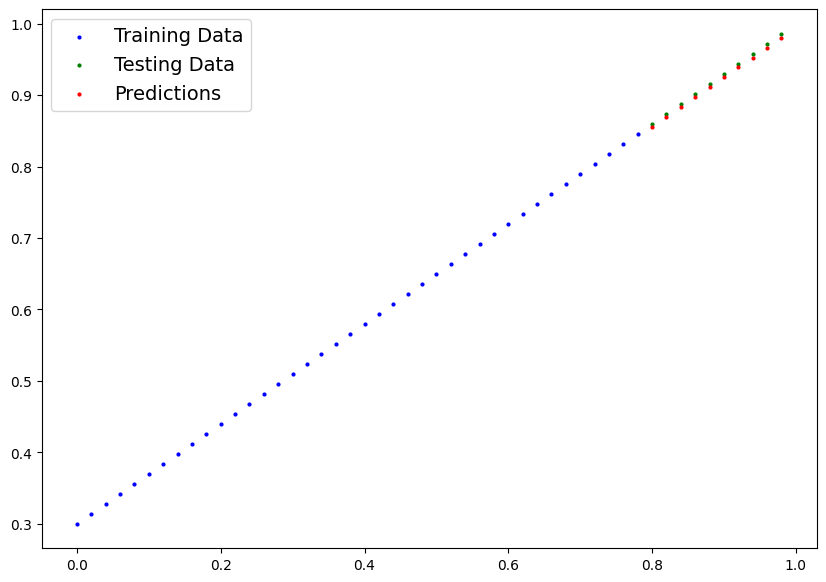

In [ ]:
with torch.inference_mode():
    y_preds_test = model(X_test)
    plot_prediction(predictions=y_preds_test)

## Experiment Tracking through Visualization

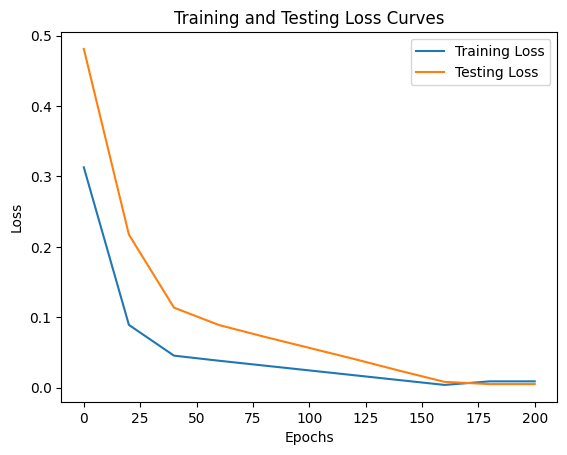

In [ ]:
with torch.inference_mode():
    plt.plot(epoch_count, train_loss_values, label="Training Loss")
    plt.plot(epoch_count, test_loss_values, label="Testing Loss")
    plt.title("Training and Testing Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend();

## Saving a Model in PyTorch

- `torch.save()`	- Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
- `torch.load()` - Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
- `torch.nn.Module.load_state_dict()` - Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

---
What is the difference between model.state_dict() and optimizer.state_dict()??
---

In [ ]:
from pathlib import Path

1. Create a model directory
2. Create a model save path
3. Save the model state_dict to the model path

In [ ]:
# Create Model Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving the model to path: {MODEL_SAVE_PATH}")

# Save the model
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to path: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Jul 26 09:27 01_pytorch_workflow_model.pth


## Loading a Saved PyTorch Model

- Since we save the state_dict model the model instead of saving the entire model, we will have to create a new instance of the model class, and then load the previously saved state_dict.


In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.state_dict()           ## Here the model parameters will be set to some random values

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# To update the model parameters, we have to load the saved state_dict.
# LinearRegressionModel Class is a sub-class of the torch.nn.Module class, so we can call the load_State_dict function on it directly.
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

## Making predictions with the loaded model

In [ ]:
loaded_model.eval()
with torch.inference_mode():
    y_preds_test_loaded = loaded_model(X_test)
y_preds_test_loaded

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
y_preds_test == y_preds_test_loaded     ## Comparing the preds of the original and the loaded models.

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

In [ ]:
import torch
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cuda


### Data Creating, Train/Test Split

In [ ]:
weights = 0.7
bias = 0.3

X = torch.arange(start=0, end=1, step=0.02).unsqueeze(1)        ## [50] --> [50, 1]
y = weights * X + bias

In [ ]:
train_index = int(0.8 * len(X))
X_train, y_train = X[:train_index], y[:train_index]
X_test, y_test = X[train_index:], y[train_index:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_prediction(
        train_data=X_train,
        train_labels=y_train,
        test_data=X_test,
        test_labels=y_test,
        predictions=None):
    """
    Plots trainind data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    train_data = train_data.cpu()
    train_labels = train_labels.cpu()
    test_data = test_data.cpu()
    test_labels = test_labels.cpu()

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")

    if predictions is not None:
        # predictions.cpu()
        predictions = predictions.cpu().numpy()
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size": 14})

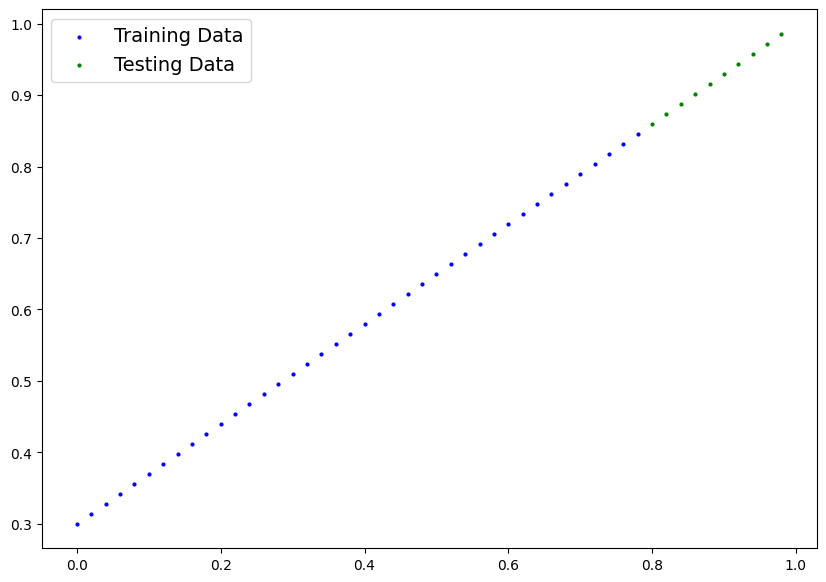

In [ ]:
plot_prediction()

### Building the LinearRegression Model

The Linear Layer of PyTorch can also be called
- Dense Layer (in TensorFlow)
- Probing Layer
- Fully Connected Layer
- Liner Transform

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Here we will use nn.Linaer for creating model parameters insteading of careting the parameters manually
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
         return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)

model_v2 = LinearRegressionModelV2()
model_v2

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
## To check which device the model is on
next(model_v2.parameters()).device            ## Getting one parameter tensor from the model and checking the device of that

device(type='cpu')

In [ ]:
### Set the model to use the target device
model_v2.to(device)
next(model_v2.parameters()).device

device(type='cuda', index=0)

### Training the model

In [ ]:
loss_v2 = nn.L1Loss()           ## MAE Loss
loss_v2

L1Loss()

In [ ]:
optimizer_v2 = torch.optim.SGD(params=model_v2.parameters(),
                               lr=0.01)
optimizer_v2

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
torch.manual_seed(42)

def train(model, device, X_train, y_train, X_test, y_test, epochs=201):

    epoch_count = list()
    train_loss_values = list()
    test_loss_values = list()

    # Putting everything on the target device
    model_v2.to(device)
    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)
    y_test = y_test.to(device)

    # Running the training loop
    for epoch in range(epochs):
        model.train()
        train_preds = model(X_train)
        train_loss = loss_v2(train_preds, y_train)
        optimizer_v2.zero_grad()
        train_loss.backward()
        optimizer_v2.step()

        model.eval()
        with torch.inference_mode():
            test_preds = model(X_test)
            test_loss = loss_v2(test_preds, y_test)

        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss)
            test_loss_values.append(test_loss)
            print(f"Epoch #: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss}")
            print(model.state_dict(), "\n")

    return model, epoch_count, train_loss_values, test_loss_values

In [ ]:
model, epoch_count, train_loss_values, test_loss_values = train(model_v2, device, X_train, y_train, X_test, y_test, epochs=200)

Epoch #: 0 | MAE Train Loss: 0.5551779866218567 | MAE Test Loss: 0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))]) 

Epoch #: 20 | MAE Train Loss: 0.3247582018375397 | MAE Test Loss: 0.30455657839775085
OrderedDict([('linear_layer.weight', tensor([[0.6826]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))]) 

Epoch #: 40 | MAE Train Loss: 0.09433845430612564 | MAE Test Loss: 0.03513690456748009
OrderedDict([('linear_layer.weight', tensor([[0.6046]], device='cuda:0')), ('linear_layer.bias', tensor([0.4200], device='cuda:0'))]) 

Epoch #: 60 | MAE Train Loss: 0.019956795498728752 | MAE Test Loss: 0.045803118497133255
OrderedDict([('linear_layer.weight', tensor([[0.6025]], device='cuda:0')), ('linear_layer.bias', tensor([0.3410], device='cuda:0'))]) 

Epoch #: 80 | MAE Train Loss: 0.013089174404740334 | MAE Test Loss: 0.02994490973651409
OrderedDict([('linear_

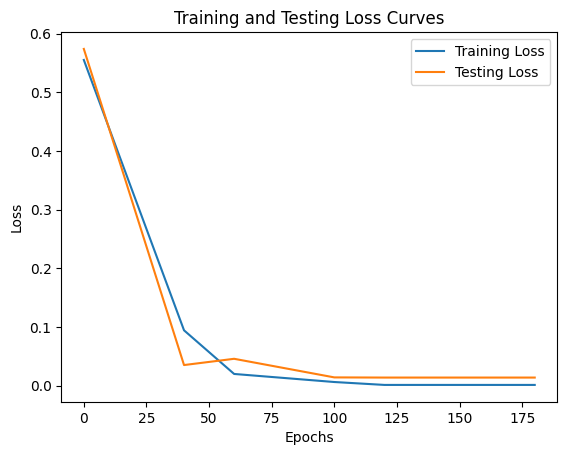

In [ ]:
import numpy as np

with torch.inference_mode():
    plt.plot(epoch_count, torch.tensor(train_loss_values).numpy(), label="Training Loss")           ## Converting the list to numpy moved the data to cpu
    plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Testing Loss")
    plt.title("Training and Testing Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend();

In [ ]:
X_test.device

device(type='cpu')

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

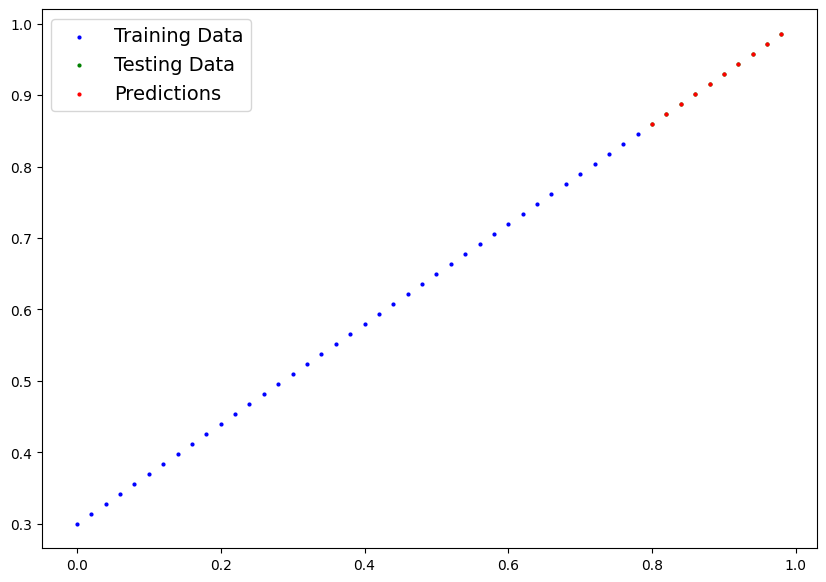

In [ ]:
model.eval()
with torch.inference_mode():
    X_test = X_test.to(device)
    test_preds_new = model(X_test)
# plot_prediction()
plot_prediction(predictions=test_preds_new)

### Saving and Loading the Model

In [ ]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_modelv2.pth"      ## can use "pth" ot "pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the Model to path: {MODEL_SAVE_PATH}")
torch.save(obj=model_v2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the Model to path: models/01_pytorch_workflow_modelv2.pth


In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1668 Jul 26 09:27 01_pytorch_workflow_model.pth
-rw-r--r-- 1 root root 1744 Jul 26 09:40 01_pytorch_workflow_modelv2.pth


In [ ]:
## Loading the model
loaded_model_v2 = LinearRegressionModelV2()
loaded_model_v2.to(device)
loaded_model_v2

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_v2.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
loaded_model_v2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
## Evaluating the loaded model
model.eval()
with torch.inference_mode():
    loaded_test_preds = loaded_model_v2(X_test)
loaded_test_preds == test_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')